# Import libraries

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Functions

In [33]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

dslabs_functions lodaded


In [44]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'dataset/df_ecom_profiling_vcleaned.csv'

excel_mapping_filepath=r'dataset/df_ecom_values_encoded_vcleaned.xlsx'

file_tag = 'df_ecom_encoded'

# Load

In [35]:
test_data = False
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)


# encoded dataframe duplication
df_enc = df.copy()

df_enc.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373925 entries, 0 to 373924
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  269349 non-null  object 
 1   category_code_lvl_2  269349 non-null  object 
 2   price                373925 non-null  float64
 3   is_purchase          373925 non-null  int64  
 4   activity_in_session  373925 non-null  float64
 5   week_of_month        373925 non-null  int64  
 6   is_weekend           373925 non-null  object 
 7   day_of_week          373925 non-null  object 
 8   day                  373925 non-null  int64  
 9   hour                 373925 non-null  int64  
 10  min                  373925 non-null  int64  
 11  time_of_day          373925 non-null  object 
 12  brand_value          340955 non-null  float64
 13  product_category     373925 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 39.9+ MB


,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day,brand_value,product_category
0,NaN,NaN,118.41,0,3.0,2,weekend,Saturday,9,5,35,morning,92.9,unknown_12712573
1,electronics,electronics/smartphone,92.38,0,0.0,4,weekend,Sunday,24,12,26,afternoon,89.0,electronics/smartphone_1005019
2,appliances,appliances/environment,35.78,0,5.0,3,weekday,Thursday,21,14,32,afternoon,37.3,appliances/environment_6200690
3,electronics,electronics/smartphone,179.16,0,5.0,3,weekend,Saturday,16,16,34,afternoon,282.5,electronics/smartphone_1004833
4,electronics,electronics/smartphone,193.03,1,4.0,3,weekend,Saturday,16,10,26,morning,254.9,electronics/smartphone_1005202
5,NaN,NaN,2.65,0,0.0,3,weekend,Sunday,17,9,37,morning,NaN,unknown_24100293
6,NaN,NaN,30.76,0,0.0,2,weekend,Saturday,9,14,41,afternoon,NaN,unknown_12709558
7,appliances,appliances/kitchen,179.90,1,4.0,4,weekday,Wednesday,27,4,5,night,258.2,appliances/kitchen_3600145
8,appliances,appliances/sewing_machine,133.83,0,7.0,3,weekday,Friday,15,17,27,afternoon,229.2,appliances/sewing_machine_5000339
9,electronics,electronics/smartphone,212.51,0,1.0,1,weekday,Thursday,7,15,59,afternoon,282.5,electronics/smartphone_1005168


In [36]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
category_code_lvl_1       13
category_code_lvl_2       58
price                  19181
is_purchase                2
activity_in_session      107
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                4
brand_value             1513
product_category       40323
dtype: int64


In [37]:
df.shape[0]

373925

# Data Preparation
- Goal is to improve the quality of the data

#### List of distinct values for each variable

In [38]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
            variable_types["binary"].append(c)
        else:
            if df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['price', 'activity_in_session', 'week_of_month', 'day', 'hour', 'min', 'brand_value'], 'binary': ['is_purchase', 'is_weekend'], 'date': [], 'symbolic': ['category_code_lvl_1', 'category_code_lvl_2', 'day_of_week', 'time_of_day', 'product_category']}


In [39]:
for v in variable_types["symbolic"]:
    print(v, df[v].unique())

category_code_lvl_1 [nan 'electronics' 'appliances' 'auto' 'apparel' 'construction'
 'computers' 'accessories' 'sport' 'furniture' 'kids' 'medicine'
 'country_yard' 'stationery']
category_code_lvl_2 [nan 'electronics/smartphone' 'appliances/environment'
 'appliances/kitchen' 'appliances/sewing_machine' 'auto/accessories'
 'apparel/tshirt' 'construction/tools' 'electronics/clocks'
 'electronics/audio' 'apparel/shoes' 'computers/peripherals'
 'appliances/ironing_board' 'accessories/bag' 'electronics/tablet'
 'electronics/video' 'computers/notebook' 'appliances/iron'
 'sport/trainer' 'furniture/living_room' 'computers/components'
 'computers/desktop' 'furniture/bedroom' 'apparel/dress'
 'electronics/telephone' 'appliances/personal' 'kids/fmcg'
 'apparel/costume' 'furniture/kitchen' 'kids/carriage' 'computers/ebooks'
 'kids/toys' 'kids/dolls' 'kids/swing' 'electronics/camera'
 'medicine/tools' 'kids/skates' 'sport/snowboard' 'apparel/trousers'
 'sport/bicycle' 'accessories/wallet' 'furnitu

In [40]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
category_code_lvl_1       13
category_code_lvl_2       58
price                  19181
is_purchase                2
activity_in_session      107
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                4
brand_value             1513
product_category       40323
dtype: int64


# Encoding
- we need to do the enconding of the symoblic and cyclical vraibles of the dataset
    - Simbolyc
        - product_category
        - category_code_lvl_1
        - category_code_lvl_2
    - Cyclical
        - time_of_day
        - day_of_week
        - hour
        - min
    
    - Numeric 
        - week_of_month
        - day
        - brand_value
        - activity_in_session
        - price

    - Binary
        - is_weekend


{'numeric': ['price', 'week_of_month', 'day', 'hour', 'min'], 'binary': ['conversion', 'is_weekend'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'day_of_week', 'time_of_day']}

# Encoding Detail

- Ordinal enconding:
  - is_weekend
    - 0: weekday
    - 1: weekend

- Hierachical encoding: Simbolyic Variables
  - category_code_lvl_1
    - Rule: Similarity between categories of products(eletronics more close to computers than furniture)
  - category_code_lvl_2
    - Rule: Similarity between 2nd category level of products, and according to the hierarchy of the category_code_lvl_1 
  - product_category
    - Rule: cast between product_id + category_code_lvl_2. Order the output values through the order previously defined for category_code_lvl_2 
 

- Cyclical enconding: Simbolyic Variables
  - day_of_week
  - time_of_day
  - hour
  - min

- Numeric Values that don't need encoding
  - week_of_month
  - day
  - brand_value
  - activity_in_session
  - price

Note: week_of_month and day in our case are ordinal variables, and not cyclical, because our dataset only has data for 1 month, nov/19, which means that these two variables don't repeat over time in our dataset.

#### Ordinal enconding

For these variables, they are cyclical. However, as we only have data for 1 month in our dataset, there are some variables that will not repeat in our dataset. So for this variables will make the hierarchy according to the proximity in time of the values:
Ex: week 1, is more close to week 2, than to week 5
- week_of_month
- day

For event_type, we are doing the hiearchy accoring to the proximity of the events in the user journey inside the website
ex: view, is more close to view_cart than to purchase
- event_type



For Brand for the hierarchy we will considering the proximity between the countries of each brand
- brand

For the category_code columns
- category_code_level1
- category_code_level2
- category_code_level3




In [41]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
            variable_types["binary"].append(c)
        else:
            if df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['price', 'activity_in_session', 'week_of_month', 'day', 'hour', 'min', 'brand_value'], 'binary': ['is_purchase', 'is_weekend'], 'date': [], 'symbolic': ['category_code_lvl_1', 'category_code_lvl_2', 'day_of_week', 'time_of_day', 'product_category']}


In [12]:
df.head()

,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day,brand_value,brand_category,product_category
0,electronics,electronics/smartphone,202.50,0,5.0,3,weekday,Friday,15,12,30,afternoon,173.5,electronics_xiaomi,electronics/smartphone_1005159
1,NaN,NaN,334.37,0,0.0,3,weekend,Saturday,16,12,6,afternoon,NaN,NaN,unknown_15700019
2,electronics,electronics/smartphone,952.15,1,2.0,5,weekday,Friday,29,4,1,night,779.2,electronics_apple,electronics/smartphone_1004227
3,appliances,appliances/kitchen,347.47,0,9.0,3,weekend,Saturday,16,16,53,afternoon,282.5,appliances_samsung,appliances/kitchen_3601250
4,electronics,electronics/smartphone,202.06,0,2.0,3,weekend,Sunday,17,13,13,afternoon,173.5,electronics_xiaomi,electronics/smartphone_1005160


#### bulk Symbolic mapping through Excel

    - Simbolyc
        - product_category
        - category_code_lvl_1
        - category_code_lvl_2

    - Binary
        - is_weekend

In [45]:


# Generalized function to encode any column based on a mapping dictionary
def encode_column_with_mapping(df, column, mapping_dict, default_value=np.nan):
    """
    Encode a column based on a mapping dictionary.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the column to encode.
    column (str): The column name to encode.
    mapping_dict (dict): Dictionary where keys are the original values and values are the encodings.
    default_value: Value to assign if the key is not found in the mapping dict (default is NaN).
    
    Returns:
    pd.Series: Encoded column.
    """
    return df[column].map(mapping_dict).fillna(default_value)



def sheet_to_dict(excel_file, sheet_name):
    """
    Converts a sheet in an Excel file to a dictionary with the first column as the key and the second as the value.
    
    Args:
    excel_file (str): Path to the Excel file.
    sheet_name (str): Name of the sheet to convert.
    
    Returns:
    dict: A dictionary with keys from the first column and values from the second column.
    """
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Ensure that there are at least two columns
    if df.shape[1] < 2:
        raise ValueError(f"The sheet '{sheet_name}' does not have at least two columns.")
    
    # Create a dictionary from the first and second columns
    mapping_dict = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))
    
    return mapping_dict



In [46]:
excel_file = pd.ExcelFile(excel_mapping_filepath)
sheet_names = excel_file.sheet_names  # List of all sheet names

# Iterate over each sheet and map the corresponding column
for sheet in sheet_names:
    # Assuming the sheet names match the column names in data_enc
    if sheet in df_enc.columns:
        # Load the sheet as a dictionary
        category_mapping = sheet_to_dict(excel_mapping_filepath, sheet)
        
        # Encode the corresponding column in data_enc using the mapping
        df_enc[sheet] = encode_column_with_mapping(df_enc, sheet, category_mapping)
        print(f'{sheet} column encoded')

    else:
        print(f"Warning: No matching column found in data_enc for sheet '{sheet}'")




category_code_lvl_1 column encoded
category_code_lvl_2 column encoded
product_category column encoded
is_weekend column encoded


In [47]:
df_enc.head()

,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day,brand_value,product_category
0,NaN,NaN,118.41,0,3.0,2,1,Saturday,9,5,35,morning,92.9,23846
1,0.0,3.0,92.38,0,0.0,4,1,Sunday,24,12,26,afternoon,89.0,2269
2,2.0,17.0,35.78,0,5.0,3,0,Thursday,21,14,32,afternoon,37.3,11484
3,0.0,3.0,179.16,0,5.0,3,1,Saturday,16,16,34,afternoon,282.5,2164
4,0.0,3.0,193.03,1,4.0,3,1,Saturday,16,10,26,morning,254.9,2416


In [48]:
for v in variable_types["symbolic"]:
    print(v, df_enc[v].unique())

category_code_lvl_1 [nan  0.  2.  9.  5. 12.  1.  6.  8.  3.  7. 10.  4. 11.]
category_code_lvl_2 [nan  3. 17. 15. 14. 56. 26. 60.  6.  0. 38. 10. 13. 42.  4.  1.  8. 12.
 51. 19.  9.  7. 20. 29.  5. 16. 50. 41. 18. 47. 11. 45. 46. 48.  2. 57.
 49. 55. 31. 53. 43. 21. 54. 34. 32. 59. 36. 24. 58. 37. 28. 44. 27. 22.
 52. 23. 39. 30. 40.]
day_of_week ['Saturday' 'Sunday' 'Thursday' 'Wednesday' 'Friday' 'Monday' 'Tuesday']
time_of_day ['morning' 'afternoon' 'night' 'evening']
product_category [23846  2269 11484 ... 11192 32617 17045]


#### Cyclical enconding
- We have variables, time variables, that are cyclical, meaning that the values of the variables can repeat over time. 
    - day_of_week
    - time_of_day
    - hour
    - min


So basicaly, if we look to time_of_day (morning, afternoon, night). Night is close to afternoon but is also at the same distant from morning, becase after night we will have the monrning

In [49]:
from math import pi, sin, cos

day_of_week_val: dict[str, float] = {
    "Sunday": 0,           # Domingo
    "Monday": 2 * pi / 7,  # Segunda-feira
    "Tuesday": 4 * pi / 7, # Terça-feira
    "Wednesday": 6 * pi / 7, # Quarta-feira
    "Thursday": 8 * pi / 7,  # Quinta-feira
    "Friday": 10 * pi / 7,  # Sexta-feira
    "Saturday": 12 * pi / 7  # Sábado
}

time_of_day_val: dict[str, float] = {
    'night': 0,   
    'morning': pi/2,
    'afternoon': pi,
    'evening': -pi/2,   
}

# Dicionário de encoding apenas para as variáveis categóricas
encoding: dict[str, dict] = {
    "day_of_week": day_of_week_val,
    "time_of_day": time_of_day_val,
}

# Aplicar o encoding categórico ao DataFrame
df_enc = df_enc.replace(encoding)

df_enc.head(10)

,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day,brand_value,product_category
0,NaN,NaN,118.41,0,3.0,2,1,5.385587,9,5,35,1.570796,92.9,23846
1,0.0,3.0,92.38,0,0.0,4,1,0.000000,24,12,26,3.141593,89.0,2269
2,2.0,17.0,35.78,0,5.0,3,0,3.590392,21,14,32,3.141593,37.3,11484
3,0.0,3.0,179.16,0,5.0,3,1,5.385587,16,16,34,3.141593,282.5,2164
4,0.0,3.0,193.03,1,4.0,3,1,5.385587,16,10,26,1.570796,254.9,2416
5,NaN,NaN,2.65,0,0.0,3,1,0.000000,17,9,37,1.570796,NaN,30753
6,NaN,NaN,30.76,0,0.0,2,1,5.385587,9,14,41,3.141593,NaN,23210
7,2.0,15.0,179.90,1,4.0,4,0,2.692794,27,4,5,0.000000,258.2,9232
8,2.0,14.0,133.83,0,7.0,3,0,4.487990,15,17,27,3.141593,229.2,7213
9,0.0,3.0,212.51,0,1.0,1,0,3.590392,7,15,59,3.141593,282.5,2385


In [50]:
# Função para aplicar encoding cíclico
def encode_cyclic_variables(df_enc, vars):
    for v in vars:
        # Ajustar x_max para cada variável cíclica
        if v == "hour":
            x_max = 24  # Ciclo de 24 horas
        elif v == "min":
            x_max = 60  # Ciclo de 60 minutos
        elif v == "time_of_day":
            x_max = 4   # Ciclo de 4 períodos do dia
        elif v == "day_of_week":
            x_max = 7   # Ciclo de 7 dias da semana
        else:
            x_max = max(df_enc[v])  # Para outras variáveis (se houver)

        # Aplicar sin e cos para a variável
        df_enc[v + "_sin"] = df_enc[v].apply(lambda x: round(sin(2 * pi * x / x_max), 3))
        df_enc[v + "_cos"] = df_enc[v].apply(lambda x: round(cos(2 * pi * x / x_max), 3))
    
    return df_enc

# Variáveis cíclicas que já estão numericamente codificadas ou são numéricas
cyclical_vars = ["time_of_day", "day_of_week", "hour", "min"]

# Aplicar a codificação cíclica
df_enc = encode_cyclic_variables(df_enc, cyclical_vars)

# Verificar os resultados
df_enc.head(15)


,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day_of_week,day,hour,...,brand_value,product_category,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,NaN,NaN,118.41,0,3.0,2,1,5.385587,9,5,...,92.9,23846,0.624,-0.781,-0.993,0.121,0.966,0.259,-0.500,-0.866
1,0.0,3.0,92.38,0,0.0,4,1,0.000000,24,12,...,89.0,2269,-0.975,0.221,0.000,1.000,0.000,-1.000,0.407,-0.914
2,2.0,17.0,35.78,0,5.0,3,0,3.590392,21,14,...,37.3,11484,-0.975,0.221,-0.081,-0.997,-0.500,-0.866,-0.208,-0.978
3,0.0,3.0,179.16,0,5.0,3,1,5.385587,16,16,...,282.5,2164,-0.975,0.221,-0.993,0.121,-0.866,-0.500,-0.407,-0.914
4,0.0,3.0,193.03,1,4.0,3,1,5.385587,16,10,...,254.9,2416,0.624,-0.781,-0.993,0.121,0.500,-0.866,0.407,-0.914
5,NaN,NaN,2.65,0,0.0,3,1,0.000000,17,9,...,NaN,30753,0.624,-0.781,0.000,1.000,0.707,-0.707,-0.669,-0.743
6,NaN,NaN,30.76,0,0.0,2,1,5.385587,9,14,...,NaN,23210,-0.975,0.221,-0.993,0.121,-0.500,-0.866,-0.914,-0.407
7,2.0,15.0,179.90,1,4.0,4,0,2.692794,27,4,...,258.2,9232,0.000,1.000,0.663,-0.749,0.866,0.500,0.500,0.866
8,2.0,14.0,133.83,0,7.0,3,0,4.487990,15,17,...,229.2,7213,-0.975,0.221,-0.775,-0.632,-0.966,-0.259,0.309,-0.951
9,0.0,3.0,212.51,0,1.0,1,0,3.590392,7,15,...,282.5,2385,-0.975,0.221,-0.081,-0.997,-0.707,-0.707,-0.105,0.995


In [51]:
print(df_enc.dtypes) 


category_code_lvl_1    float64
category_code_lvl_2    float64
price                  float64
is_purchase              int64
activity_in_session    float64
week_of_month            int64
is_weekend               int64
day_of_week            float64
day                      int64
hour                     int64
min                      int64
time_of_day            float64
brand_value            float64
product_category         int64
time_of_day_sin        float64
time_of_day_cos        float64
day_of_week_sin        float64
day_of_week_cos        float64
hour_sin               float64
hour_cos               float64
min_sin                float64
min_cos                float64
dtype: object


In [52]:
# Remover as colunas originais
df_enc = df_enc.drop(columns=["time_of_day", "day_of_week", "hour", "min"])

# Verificar os resultados
df_enc.head(15)

,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day,brand_value,product_category,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,NaN,NaN,118.41,0,3.0,2,1,9,92.9,23846,0.624,-0.781,-0.993,0.121,0.966,0.259,-0.500,-0.866
1,0.0,3.0,92.38,0,0.0,4,1,24,89.0,2269,-0.975,0.221,0.000,1.000,0.000,-1.000,0.407,-0.914
2,2.0,17.0,35.78,0,5.0,3,0,21,37.3,11484,-0.975,0.221,-0.081,-0.997,-0.500,-0.866,-0.208,-0.978
3,0.0,3.0,179.16,0,5.0,3,1,16,282.5,2164,-0.975,0.221,-0.993,0.121,-0.866,-0.500,-0.407,-0.914
4,0.0,3.0,193.03,1,4.0,3,1,16,254.9,2416,0.624,-0.781,-0.993,0.121,0.500,-0.866,0.407,-0.914
5,NaN,NaN,2.65,0,0.0,3,1,17,NaN,30753,0.624,-0.781,0.000,1.000,0.707,-0.707,-0.669,-0.743
6,NaN,NaN,30.76,0,0.0,2,1,9,NaN,23210,-0.975,0.221,-0.993,0.121,-0.500,-0.866,-0.914,-0.407
7,2.0,15.0,179.90,1,4.0,4,0,27,258.2,9232,0.000,1.000,0.663,-0.749,0.866,0.500,0.500,0.866
8,2.0,14.0,133.83,0,7.0,3,0,15,229.2,7213,-0.975,0.221,-0.775,-0.632,-0.966,-0.259,0.309,-0.951
9,0.0,3.0,212.51,0,1.0,1,0,7,282.5,2385,-0.975,0.221,-0.081,-0.997,-0.707,-0.707,-0.105,0.995


In [55]:
df_enc.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price', 'is_purchase',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos'],
      dtype='object')

In [56]:
df_enc.head(10) 

,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day,brand_value,product_category,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,NaN,NaN,118.41,0,3.0,2,1,9,92.9,23846,0.624,-0.781,-0.993,0.121,0.966,0.259,-0.500,-0.866
1,0.0,3.0,92.38,0,0.0,4,1,24,89.0,2269,-0.975,0.221,0.000,1.000,0.000,-1.000,0.407,-0.914
2,2.0,17.0,35.78,0,5.0,3,0,21,37.3,11484,-0.975,0.221,-0.081,-0.997,-0.500,-0.866,-0.208,-0.978
3,0.0,3.0,179.16,0,5.0,3,1,16,282.5,2164,-0.975,0.221,-0.993,0.121,-0.866,-0.500,-0.407,-0.914
4,0.0,3.0,193.03,1,4.0,3,1,16,254.9,2416,0.624,-0.781,-0.993,0.121,0.500,-0.866,0.407,-0.914
5,NaN,NaN,2.65,0,0.0,3,1,17,NaN,30753,0.624,-0.781,0.000,1.000,0.707,-0.707,-0.669,-0.743
6,NaN,NaN,30.76,0,0.0,2,1,9,NaN,23210,-0.975,0.221,-0.993,0.121,-0.500,-0.866,-0.914,-0.407
7,2.0,15.0,179.90,1,4.0,4,0,27,258.2,9232,0.000,1.000,0.663,-0.749,0.866,0.500,0.500,0.866
8,2.0,14.0,133.83,0,7.0,3,0,15,229.2,7213,-0.975,0.221,-0.775,-0.632,-0.966,-0.259,0.309,-0.951
9,0.0,3.0,212.51,0,1.0,1,0,7,282.5,2385,-0.975,0.221,-0.081,-0.997,-0.707,-0.707,-0.105,0.995


In [57]:
# Criar uma lista para armazenar os valores distintos
distinct_values = {}

# Variáveis cíclicas que você criou
cyclical_vars = ['time_of_day', 'day_of_week', 'hour', 'min']

# Loop para obter valores distintos de cada coluna sin e cos
for var in cyclical_vars:
    distinct_sin = df_enc[f'{var}_sin'].unique()
    distinct_cos = df_enc[f'{var}_cos'].unique()
    
    # Armazenar os valores distintos em um dicionário
    distinct_values[f'{var}_sin'] = distinct_sin
    distinct_values[f'{var}_cos'] = distinct_cos

# Imprimir os valores distintos
for key, values in distinct_values.items():
    print(f"Valores distintos de {key}:", values)


Valores distintos de time_of_day_sin: [ 0.624 -0.975  0.    -0.624]
Valores distintos de time_of_day_cos: [-0.781  0.221  1.   ]
Valores distintos de day_of_week_sin: [-0.993  0.    -0.081  0.663 -0.775  0.721  0.999]
Valores distintos de day_of_week_cos: [ 0.121  1.    -0.997 -0.749 -0.632  0.693 -0.041]
Valores distintos de hour_sin: [ 0.966  0.    -0.5   -0.866  0.5    0.707  0.866 -0.966 -0.707  0.259
 -0.259  1.    -1.   ]
Valores distintos de hour_cos: [ 0.259 -1.    -0.866 -0.5   -0.707  0.5   -0.259 -0.966  0.966  0.
  0.707  0.866  1.   ]
Valores distintos de min_sin: [-0.5    0.407 -0.208 -0.407 -0.669 -0.914  0.5    0.309 -0.105  0.809
 -0.978  0.    -0.309  0.866  0.669  0.105 -0.588  0.588  0.951 -0.809
  0.208 -0.866  1.     0.995 -1.     0.914 -0.951  0.743  0.978 -0.743
 -0.995]
Valores distintos de min_cos: [-0.866 -0.914 -0.978 -0.743 -0.407  0.866 -0.951  0.995  0.914 -0.588
 -0.208 -1.    -0.5    0.407  0.743  1.     0.809 -0.809 -0.309  0.978
  0.5    0.309  0.    

##### Visual representation of cyclical variables

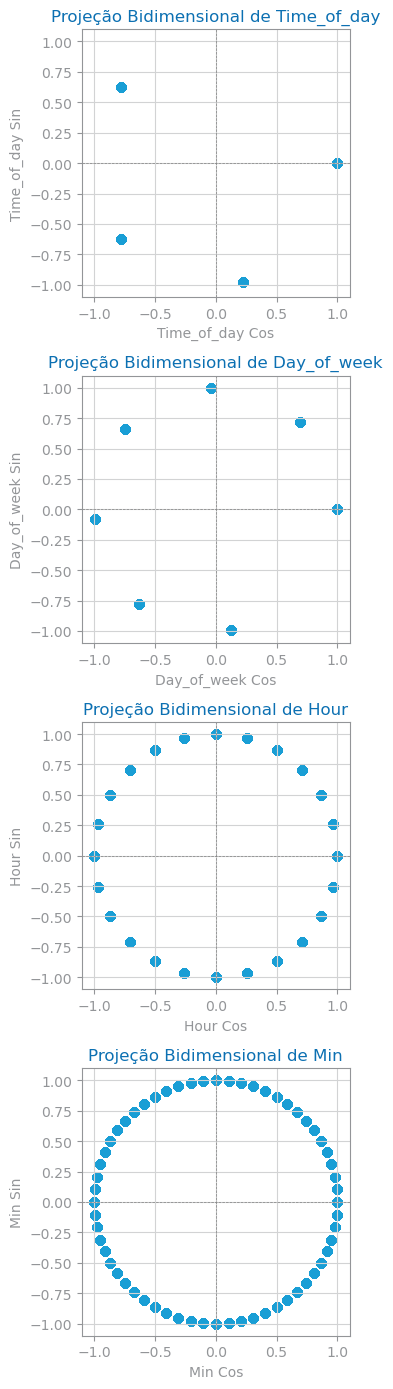

In [58]:
import matplotlib.pyplot as plt

# Lista de variáveis cíclicas
cyclical_vars = ['time_of_day', 'day_of_week', 'hour', 'min']

# Criar gráficos de dispersão para cada variável cíclica com tamanho maior
plt.figure(figsize=(14, 14))  # Aumentando o tamanho da figura

for i, var in enumerate(cyclical_vars):
    # Valores de seno e cosseno para a variável atual
    x_values = df_enc[f'{var}_cos']
    y_values = df_enc[f'{var}_sin']
    
    # Criar um subplot para cada variável
    plt.subplot(len(cyclical_vars), 1, i + 1)
    plt.scatter(x_values, y_values, alpha=0.6)
    plt.axhline(0, color='gray', lw=0.5, ls='--')
    plt.axvline(0, color='gray', lw=0.5, ls='--')
    
    # Ajustar os limites dos eixos para melhor visualização
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    # Adicionar título e rótulos
    plt.title(f'Projeção Bidimensional de {var.capitalize()}')
    plt.xlabel(f'{var.capitalize()} Cos')
    plt.ylabel(f'{var.capitalize()} Sin')
    
    # Mostrar a grade
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')  # Para garantir que o gráfico é circular

plt.tight_layout()  # Ajustar o layout
plt.show()  # Mostrar todos os gráficos


## Correlation between variable after enconding

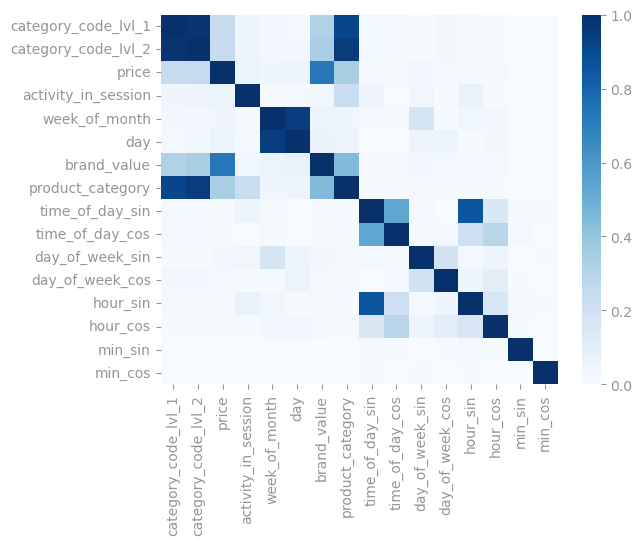

In [59]:
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show

variables_types: dict[str, list] = get_variable_types(df_enc)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = df_enc[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
#savefig(f"images/{file_tag}_correlation_analysis.png")
show()

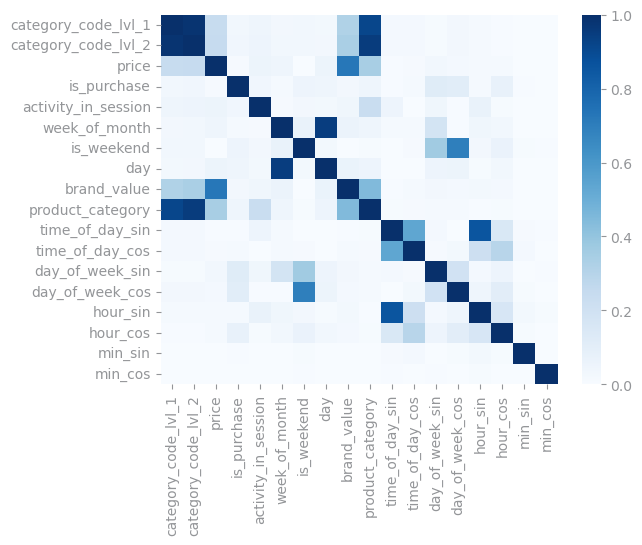

In [60]:
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show

variables_types: dict[str, list] = get_variable_types(df_enc)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = df_enc.corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=df_enc.columns,
    yticklabels=df_enc.columns,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
#savefig(f"images/{file_tag}_correlation_analysis.png")
show()

## Save final df from Data preparation - ENCODING into a csv file
- We will use this dataset for the missing alues

In [61]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_ecom_data_prep_encoded_vcleaned.csv'

# Salvar o DataFrame em CSV
df_enc.to_csv(filepath, index=False)